In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

In [19]:
data = np.load('FirstMap.npz')
az = data['az']
el = data['el']
pwr = data['pwr']
az -= np.mean(az)
el -= np.mean(el)

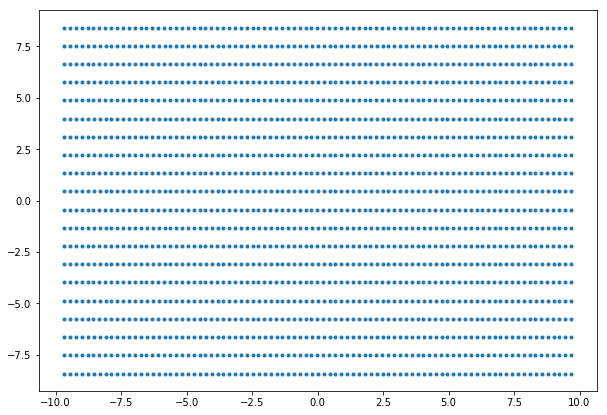

In [20]:
plt.figure(1,figsize=(10,7))
plt.clf()
plt.plot(az,el,'.')
plt.show()

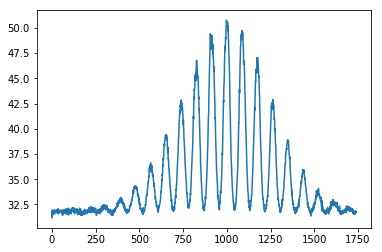

In [21]:
plt.plot(pwr)
plt.show()

In [22]:
# The grid
eli = np.linspace(az.min(),az.max(),20)
azi = np.linspace(el.min(),el.max(),20)
# grid the data.  Not really sure if this is averaging or what ...
zi = griddata((az, el), pwr, (eli[None,:], azi[:,None]), method='nearest')

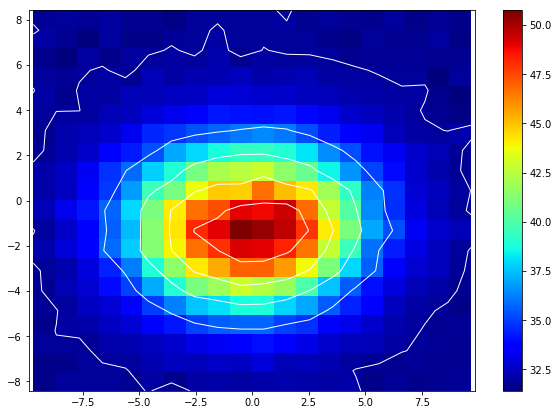

In [23]:
#Contour on top of imshow.  Try to get the bloody axis right.
# This assumes the contour routine is doing it right.  But I think imshow might have it right ...
plt.figure(1,figsize=(10,7))
plt.clf()
plt.imshow(np.flipud(zi),aspect='auto',cmap=plt.cm.jet,extent=[eli.min(),eli.max(),azi.min(),azi.max()])
plt.colorbar()
CS = plt.contour(eli,azi,zi,5,linewidths=1,colors='w')
plt.axis('equal')
plt.show()

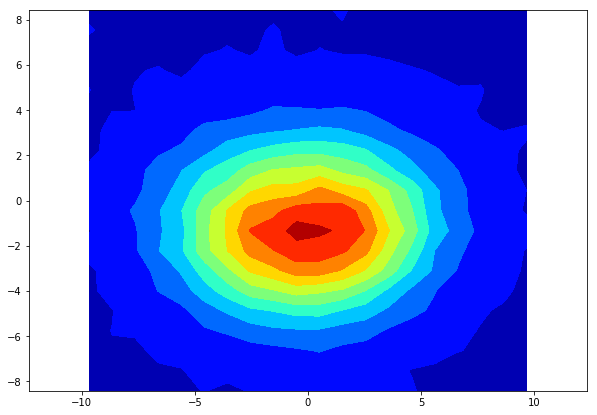

In [24]:
plt.figure(1,figsize=(10,7))
plt.clf()
CS = plt.contourf(eli,azi,zi,10,cmap=plt.cm.jet)
plt.axis('equal')
plt.show()